In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('GEOMETRIC+MEAN+LEAN+SIX+SIGMA+GREEN+BELT+-+Copy.csv')

In [4]:
df.head()

,YEAR,RETURN ON INVESTMENT,CONVERTED %
0,1990.0,50%,NaN
1,1991.0,98%,NaN
2,1992.0,130%,NaN
3,1993.0,80%,NaN
4,1994.0,-90%,NaN


In [5]:
type(df['CONVERTED %'])

pandas.core.series.Series

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YEAR                  5 non-null      float64
 1   RETURN ON INVESTMENT  5 non-null      object 
 2   CONVERTED %           1 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [7]:
df.head(6)

,YEAR,RETURN ON INVESTMENT,CONVERTED %
0,1990.0,50%,NaN
1,1991.0,98%,NaN
2,1992.0,130%,NaN
3,1993.0,80%,NaN
4,1994.0,-90%,NaN
5,NaN,NaN,GEOMETRIC MEAN


In [8]:
df = df.drop([0,5])

In [9]:
df['RETURN ON INVESTMENT'] = df['RETURN ON INVESTMENT'].str.rstrip('%').astype('float') / 100.0

In [10]:
df.head(10)

,YEAR,RETURN ON INVESTMENT,CONVERTED %
1,1991.0,0.98,NaN
2,1992.0,1.30,NaN
3,1993.0,0.80,NaN
4,1994.0,-0.90,NaN


In [11]:
 df['RETURN ON INVESTMENT_CORRECTED']= df['RETURN ON INVESTMENT'] + 1

In [12]:
df.head(10)

,YEAR,RETURN ON INVESTMENT,CONVERTED %,RETURN ON INVESTMENT_CORRECTED
1,1991.0,0.98,NaN,1.98
2,1992.0,1.30,NaN,2.30
3,1993.0,0.80,NaN,1.80
4,1994.0,-0.90,NaN,0.10


In [13]:
RETURN_LIST = df['RETURN ON INVESTMENT_CORRECTED'].tolist()

In [14]:
RETURN_LIST

[1.98, 2.3, 1.8, 0.09999999999999998]

In [15]:
import scipy as sp

In [16]:
from scipy.stats import gmean

In [17]:
gmean(RETURN_LIST)

0.9515166296376899

In [18]:
import random
#Generate 5 random numbers between 10 and 30
randomlist = random.sample(range(1,400), 5)
print(randomlist)

[210, 108, 375, 249, 114]


# NORMAL DISTRIBUTION

In [19]:
df1 = pd.read_csv('Green Belt exercise.csv')

In [20]:
df1.head()

,Plant A: KM x 1000 before failure,Plant B: KM x 1000 before failure,MEAN PLANT A,MEAN PLANT B
0,60,60,NaN,NaN
1,60,54,STD DEV PLANT A,STD DEV PLANT B
2,59,60,NaN,NaN
3,58,50,NaN,NaN
4,60,76,NaN,NaN


In [21]:
df1 = df1.drop('MEAN PLANT A',axis=1)

In [22]:
df1 = df1.drop('MEAN PLANT B',axis=1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Plant A: KM x 1000 before failure  29 non-null     int64
 1   Plant B: KM x 1000 before failure  29 non-null     int64
dtypes: int64(2)
memory usage: 592.0 bytes


In [24]:
df1.describe()

,Plant A: KM x 1000 before failure,Plant B: KM x 1000 before failure
count,29.000000,29.000000
mean,59.586207,58.172414
std,1.547284,13.376603
min,56.000000,25.000000
25%,59.000000,50.000000
50%,60.000000,60.000000
75%,60.000000,64.000000
max,63.000000,89.000000


In [25]:
MEAN_PLANT_A = df1['Plant A: KM x 1000 before failure'].mean()

In [26]:
MEAN_PLANT_B= df1['Plant B: KM x 1000 before failure'].mean()

Question 2:
Contrary to what many people think, crude oil is not a standardized commodity. Depending on the source it is extracted from, crude oil may be heavy or light (which depends on the amount of sediments in it) and it may be sweet or sour (which depends on the amount of sulphur in it). Assume that you work for Petrobras, a Brazilian company that is in the crude oil business. They take samples from various batches of crude oil. They measure the ‘heaviness’ of the crude oil, which again depends on the amount of sediments in it. The heaviness of crude oil is expressed in API degrees. Most types of crude oil range from 10 to 50 API degrees.

Crude oil that has a very low API degree value, is very ‘heavy.’ It contains a lot of sediments. It is generally considered lower quality oil because it requires a lot of processing. Some of the heaviest crude oil types can be found in Alberta, Canada. Assume that your sample has as a mean of 48 API degrees. Its standard deviation is 2 API degrees. Suppose that for quality reasons, you want to make sure that very little of your oil has an API degree of less than 43.5. Calculate which % of the crude oil is expected to have an API degree of less than 43.5. You do not have the use the table per se. But in this case, for the sake of the exercise, please use the Z table.

In [27]:
#calculating the z value for a score of 43.5
(43.5-48)/2

-2.25

In [28]:
# check the z score table and see that the answer is 1.22% 
#this is a rough estimative because the distribution is probably not normal

In [29]:
#sigma score is the module of the (nominal value or closest specification limit - mean) divided by the standard deviation 
#DPMO is the number of defects out of million parts or samples and it decreases with the increase of sigma score

# Correlation (Pearson Product)

Is it only for linear correlation? Yes, only for linear (in this course)

We can use seaborn to create a correlation matrix and heatmap to visualize this

In [30]:
dfcorr = pd.read_csv('EXERCISE+CORRELATION+LEAN+SIX+SIGMA+GREEN+BELT+-+Copy.csv')

In [31]:
dfcorr.head(10)

,DATE,DEFECTS,EXPERIENCE OPERATOR (MONTHS),EXPERIENCE SUPERVISOR (MONTHS),NUMBER OF OPERATORS,TRAINING SUPERVISOR (HOURS),AMOUNT OF BACKLOG
0,02-Jan,51.0,10.0,7.0,21.0,15.0,200.0
1,03-Jan,41.0,14.0,2.0,23.0,16.0,86.0
2,04-Jan,83.0,12.0,3.0,15.0,8.0,154.0
3,05-Jan,92.0,25.0,4.0,14.0,8.0,198.0
4,06-Jan,19.0,32.0,1.0,21.0,23.0,42.0
5,07-Jan,80.0,32.0,2.0,26.0,12.0,120.0
6,08-Jan,62.0,12.0,4.0,12.0,14.0,110.0
7,09-Jan,28.0,14.0,1.0,4.0,16.0,5.0
8,10-Jan,20.0,10.0,3.0,7.0,20.0,38.0
9,11-Jan,104.0,25.0,2.0,8.0,7.0,120.0


In [32]:
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATE                            15 non-null     object 
 1   DEFECTS                         15 non-null     float64
 2   EXPERIENCE OPERATOR (MONTHS)    15 non-null     float64
 3   EXPERIENCE SUPERVISOR (MONTHS)  15 non-null     float64
 4   NUMBER OF OPERATORS             15 non-null     float64
 5   TRAINING SUPERVISOR (HOURS)     15 non-null     float64
 6   AMOUNT OF BACKLOG               15 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.0+ KB


In [33]:
dfcorr.corr()

,DEFECTS,EXPERIENCE OPERATOR (MONTHS),EXPERIENCE SUPERVISOR (MONTHS),NUMBER OF OPERATORS,TRAINING SUPERVISOR (HOURS),AMOUNT OF BACKLOG
DEFECTS,1.000000,0.204546,-0.249299,0.068129,-0.939409,0.718051
EXPERIENCE OPERATOR (MONTHS),0.204546,1.000000,-0.370783,0.424061,-0.126391,-0.125593
EXPERIENCE SUPERVISOR (MONTHS),-0.249299,-0.370783,1.000000,0.114437,0.288707,0.227059
NUMBER OF OPERATORS,0.068129,0.424061,0.114437,1.000000,0.003454,0.219347
TRAINING SUPERVISOR (HOURS),-0.939409,-0.126391,0.288707,0.003454,1.000000,-0.710249
AMOUNT OF BACKLOG,0.718051,-0.125593,0.227059,0.219347,-0.710249,1.000000


In [34]:
import seaborn as sns

<AxesSubplot:>

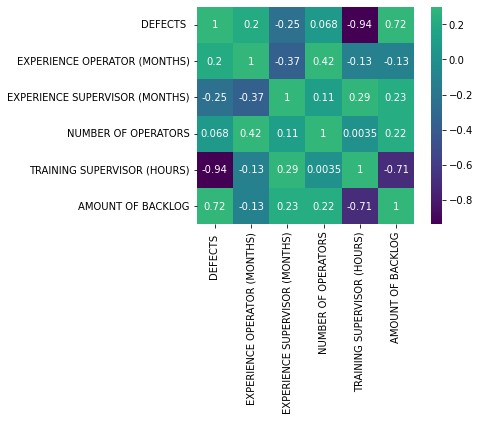

In [35]:

sns.heatmap(dfcorr.corr(),annot=True,square=True,vmax=.3, center=0,cmap="viridis")

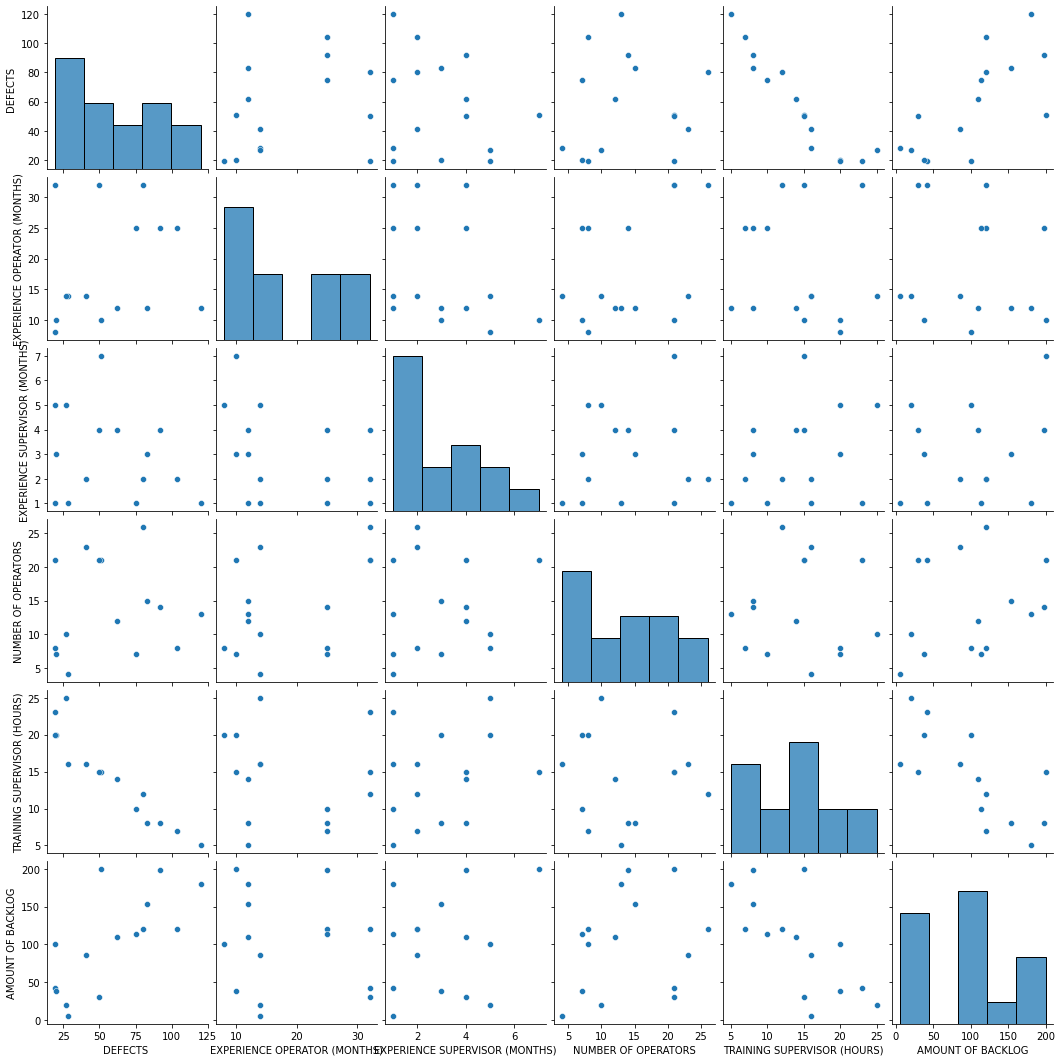

In [36]:
sns.pairplot(dfcorr)

In [37]:
dfcorr.head()

,DATE,DEFECTS,EXPERIENCE OPERATOR (MONTHS),EXPERIENCE SUPERVISOR (MONTHS),NUMBER OF OPERATORS,TRAINING SUPERVISOR (HOURS),AMOUNT OF BACKLOG
0,02-Jan,51.0,10.0,7.0,21.0,15.0,200.0
1,03-Jan,41.0,14.0,2.0,23.0,16.0,86.0
2,04-Jan,83.0,12.0,3.0,15.0,8.0,154.0
3,05-Jan,92.0,25.0,4.0,14.0,8.0,198.0
4,06-Jan,19.0,32.0,1.0,21.0,23.0,42.0


In [38]:
dfmov = pd.read_csv('Movies.csv')

In [39]:
dfmov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Movie                                       29 non-null     object
 1   Academy Award Nomination? (0 = no 1 = yes)  29 non-null     int64 
 2   Special Effects Used?(0 = no, 1 = yes)      29 non-null     int64 
 3   Budget (Mln $)                              29 non-null     int64 
 4   Ticket Sales (Mln $)                        29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [40]:
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [41]:
lin_reg = LinearRegression().fit(dfmov[['Budget (Mln $)']], dfmov['Ticket Sales (Mln $)'])
r2 = lin_reg.score(dfmov[['Budget (Mln $)']], dfmov['Ticket Sales (Mln $)'])

<AxesSubplot:xlabel='Budget (Mln $)', ylabel='Ticket Sales (Mln $)'>

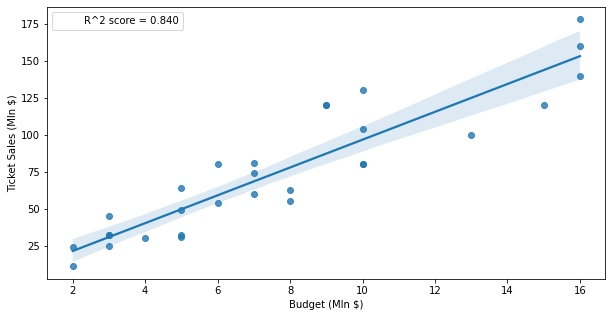

In [42]:
from matplotlib.patches import Rectangle


blank = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
fig, ax = plt.subplots(figsize=(10,5))
h, l = ax.get_legend_handles_labels()
ax.legend(h + [blank], l + [f'R^2 score = {r2:.3f}'])
sns.regplot(x='Budget (Mln $)',y='Ticket Sales (Mln $)', data=dfmov)


# Calculating PV 

In [48]:
dfpv = pd.read_excel('PV+WITH+EXCEL+LEAN+SIX+SIGMA+BLACK+BELT+-+Copy.xlsx')

In [51]:
dfpv.head()

,Time,Amount,PV
0,0,0,NaN
1,1,250,NaN
2,2,500,NaN
3,3,1000,NaN
4,4,1000,NaN


In [52]:
dr = 0.05

In [53]:
dfpv['PV'] = (dfpv['Amount'])/((1+dr)**dfpv['Time'])

In [54]:
dfpv.head()

,Time,Amount,PV
0,0,0,0.000000
1,1,250,238.095238
2,2,500,453.514739
3,3,1000,863.837599
4,4,1000,822.702475


In [55]:
1000/((1.06)**2)

889.9964400142399

In [56]:
((1.05)**3)*1000

1157.6250000000002